# AutoKeras로 이미지 분류하기

## 야수파 팀

# 데이터 구성하기

In [ ]:
%pylab inline

이미지 데이터를 넣을 폴더를 하나 만들겠습니다.

In [ ]:
!mkdir data

- 1 : 인상파
- 2 : 야수파
- 3 : 팝아트

`image_dataset.zip` 파일을 업로드하고 data 폴더에다가 압축을 풀어 주겠습니다.

In [11]:
!unzip ./image_dataset.zip -d ./data/

Archive:  ./image_dataset.zip
   creating: ./data/1/
  inflating: ./data/1/63.jpg         
  inflating: ./data/1/77.jpg         
  inflating: ./data/1/76.jpg         
  inflating: ./data/1/62.jpg         
  inflating: ./data/1/74.jpg         
  inflating: ./data/1/60.jpg         
  inflating: ./data/1/48.jpg         
  inflating: ./data/1/49.jpg         
  inflating: ./data/1/61.jpg         
  inflating: ./data/1/75.jpg         
  inflating: ./data/1/59.jpg         
  inflating: ./data/1/71.jpg         
  inflating: ./data/1/65.jpg         
  inflating: ./data/1/64.jpg         
  inflating: ./data/1/70.jpg         
  inflating: ./data/1/58.jpg         
  inflating: ./data/1/8.jpg          
  inflating: ./data/1/66.jpg         
  inflating: ./data/1/72.jpg         
  inflating: ./data/1/73.jpg         
  inflating: ./data/1/67.jpg         
  inflating: ./data/1/9.jpg          
  inflating: ./data/1/14.jpg         
  inflating: ./data/1/28.jpg         
  inflating: ./data/1/29.jpg       

이제 autokeras를 설치하겠습니다.   
tensorflow는 버전 2를 사용하도록 하죠.

In [12]:
%tensorflow_version 2.x

In [14]:
!pip install autokeras

     |████████████████████████████████| 166 kB 14.0 MB/s 
     |████████████████████████████████| 96 kB 5.7 MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-py3-none-any.whl size=9568 sha256=090c62eaca084ca14658be6ad29f7016400766d8a01e9deaa07c4342df0db26c
  Stored in directory: /root/.cache/pip/wheels/38/5c/e0/13003e68c17f403af40b92a24d20171b95fef13b0fdaba833c
Successfully built kt-legacy


In [32]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import mnist
import autokeras as ak

import os

이제 data 폴더 안에 있는 이미지들을 불러와서 학습할 데이터셋으로 변환해야 합니다.   
컬러 이미지이니 3차원 R, G, B를 가지고 있고,   
저마다 그림 크기가 다르니 같은 이미지 사이즈로 변경해 주겠습니다.

여러 가지 방법이 있지만 tensorflow 자체의 함수를 활용해 보겠습니다.

- 이미지 파일 불러오기 : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img

- 이미지를 어레이로 변환 : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/img_to_array

아래처럼 이미지를 불러와서 크기를 (100, 100)으로 바꿀 수 있습니다.

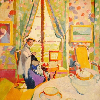

In [28]:
tf.keras.preprocessing.image.load_img(
    './data/1/1.jpg', grayscale=False, color_mode='rgb', target_size=(100, 100)
)

그럼 이제 이 이미지를 numpy array로도 바꾸어 보겠습니다.

In [29]:
img = tf.keras.preprocessing.image.load_img(
    './data/1/1.jpg', grayscale=False, color_mode='rgb', target_size=(100, 100)
)

In [31]:
tf.keras.preprocessing.image.img_to_array(img)

array([[[201., 186., 155.],
        [210., 201., 184.],
        [214., 201., 184.],
        ...,
        [192., 222., 230.],
        [198., 224., 223.],
        [183., 189., 189.]],

       [[205., 190., 171.],
        [203., 196., 190.],
        [127., 116., 112.],
        ...,
        [192., 222., 230.],
        [195., 219., 219.],
        [183., 187., 188.]],

       [[198., 188., 161.],
        [201., 199., 186.],
        [204., 196., 183.],
        ...,
        [196., 225., 233.],
        [201., 222., 223.],
        [187., 188., 190.]],

       ...,

       [[113., 140.,  95.],
        [130., 144., 111.],
        [197., 183., 156.],
        ...,
        [216., 229., 211.],
        [129., 142., 125.],
        [229., 243., 228.]],

       [[166., 181., 150.],
        [163., 172., 145.],
        [197., 193., 166.],
        ...,
        [191., 200., 205.],
        [215., 222., 228.],
        [218., 225., 231.]],

       [[172., 172., 162.],
        [180., 181., 163.],
        [182., 1

잘 된다는 걸 확인했으니, 전체 이미지 데이터를 array로 변환하여 학습할 데이터 셋으로 구성하겠습니다.

In [ ]:
# 지정한 폴더 안의 파일 목록 보기
os.listdir("./data/1/")

In [58]:
X = []  # 이미지의 numpy array를 담을 리스트
Y = []  # 정답 데이터를 담을 리스트. 1은 인상파, 2는 야수파, 3은 팝아트

for i in os.listdir("./data/1/"):
    # 인상파
    img = tf.keras.preprocessing.image.load_img(
        './data/1/'+i, grayscale=False, color_mode='rgb', target_size=(100, 100)
    )
    X.append(tf.keras.preprocessing.image.img_to_array(img))
    Y.append(1)


for i in os.listdir("./data/2/"):
    # 야수파
    img = tf.keras.preprocessing.image.load_img(
        './data/2/'+i, grayscale=False, color_mode='rgb', target_size=(100, 100)
    )
    X.append(tf.keras.preprocessing.image.img_to_array(img))
    Y.append(2)


for i in os.listdir("./data/3/"):
    # 팝아트
    img = tf.keras.preprocessing.image.load_img(
        './data/3/'+i, grayscale=False, color_mode='rgb', target_size=(100, 100)
    )
    X.append(tf.keras.preprocessing.image.img_to_array(img))
    Y.append(3)

총 235개의 데이터가 있습니다.

In [59]:
len(X)

235

리스트를 numpy array로 변환할께요.

In [60]:
X = np.array(X)
Y = np.array(Y)

클래스가 어떻게 분포되어 있는지 한 번 볼까요?   
팝아트의 개수가 상대적으로 적네요

(array([81.,  0.,  0.,  0.,  0., 96.,  0.,  0.,  0., 58.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

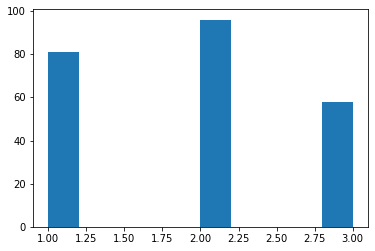

In [61]:
plt.hist(Y)

이제 데이터 X, Y를 학습 데이터와 테스트 데이터로 분리하겠습니다.   
sklearn의 `train_test_split` 함수를 이용할께요.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train에는 164개의 이미지가 있고, 각 이미지의 크기는 100 x 100, 그리고 컬러를 의미하는 RGB 3차원이네요.

In [64]:
X_train.shape

(164, 100, 100, 3)

(array([61.,  0.,  0.,  0.,  0., 64.,  0.,  0.,  0., 39.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

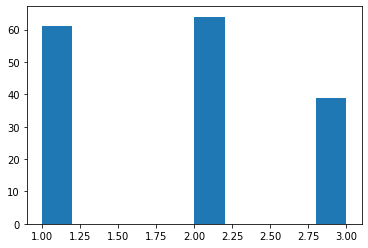

In [65]:
plt.hist(y_train)

테스트 데이터에는 상대적으로 야수파 그림이 많은 편이네요.

(array([20.,  0.,  0.,  0.,  0., 32.,  0.,  0.,  0., 19.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

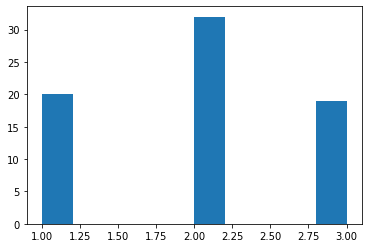

In [66]:
plt.hist(y_test)

# Autokeras 학습하기

이제 Autokeras로 학습을 돌려보겠습니다.

In [ ]:
# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=100)
# Feed the image classifier with training data.
clf.fit(X_train, y_train, epochs=50, validation_split=0.15)


# Predict with the best model.
predicted_y = clf.predict(X_test)
print(predicted_y)

# Evaluate the best model with testing data.
print(clf.evaluate(X_test, y_test))

Trial 86 Complete [00h 00m 16s]
val_loss: 0.2632192373275757

Best val_loss So Far: 0.09881781041622162
Total elapsed time: 00h 26m 21s

Search: Running Trial #87

Hyperparameter    |Value             |Best Value So Far 
image_block_1/n...|True              |True              
image_block_1/a...|True              |True              
image_block_1/b...|resnet            |vanilla           
image_block_1/r...|False             |None              
image_block_1/r...|resnet152         |None              
image_block_1/r...|True              |None              
classification_...|global_max        |global_max        
classification_...|0                 |0                 
optimizer         |adam              |adam              
learning_rate     |0.001             |0.001             
image_block_1/i...|0.1               |0.1               
image_block_1/i...|True              |True              
image_block_1/i...|True              |True              
image_block_1/i...|0.1               |

완성된 모델을 성능평가합니다.   
63%의 성능이 나왔네요!

In [69]:
print(clf.evaluate(X_test, y_test))

3/3 [==============================] - 0s 6ms/step - loss: 1.6047 - accuracy: 0.6338
[1.6047208309173584, 0.6338028311729431]


학습된 autokeras 모델을 keras model로 추출(export) 합니다.

In [70]:
model = clf.export_model()

model의 내부 설계를 한 번 볼까요?

In [71]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 100, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 100, 100, 3)       7         
_________________________________________________________________
random_translation (RandomTr (None, 100, 100, 3)       0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 100, 100, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 94, 94, 32)        4736  

모델은 저장해 두었다가 나중에 재활용할 수 있습니다.

In [72]:
try:
    model.save("model_autokeras", save_format="tf")
except Exception:
    model.save("model_autokeras.h5")

INFO:tensorflow:Assets written to: model_autokeras/assets


# 예측

완성된 모델에 이미지를 입력해서 예측된 분류 값을 추출하는 걸 해볼께요.

일단 학습할 때 사용했던 입력 이미지의 형태를 보겠습니다.   
테스트 셋의 첫 번째 이미지는 아래와 같이 생겼습니다.

In [79]:
X_test[0].shape

(100, 100, 3)

이것을 모델에 넣어서 예측하려면 array 안에 넣어주어야 합니다.

In [88]:
test_image = np.array([X_test[0]])

In [94]:
model.predict(test_image)

array([[0.89947563, 0.078239  , 0.02228539]], dtype=float32)

softmax된 값이 첫 번째가 가장 크니 y가 1의 값을 가진 인상파로 예측되었네요!

numpy array에서 인덱스는 0부터 시작하지만 우리는 y값을 1, 2, 3하고 지정했으니   
array에서 가장 큰 값을 가진 인덱스 위치를 np.argmax 로 찾아내고,   
그 값에 1을 더해 주겠습니다.   

그럼 1은 인상파, 2는 야수파, 3은 팝아트가 되겠지요?

In [166]:
np.argmax(model.predict(test_image)) + 1

3

In [167]:
y_test[0]

1

에이 근데 정답하곤 다르네요 ^^;

인터넷 상에서 이미지를 불러와서도 예측해 보겠습니다.   
아래와 같이 함수를 하나 만들께요.

In [133]:
from io import BytesIO
import urllib
from PIL import Image

def load_image(URL):
    with urllib.request.urlopen(URL) as url:
        img = Image.open(BytesIO(url.read()))
        img = img.convert("RGB")
        img = img.resize((100, 100), Image.NEAREST)
        return img

인터넷 이미지 주소를 넣으면 아래처럼 이미지를 불러올 수 있어요.

### 테스트 1

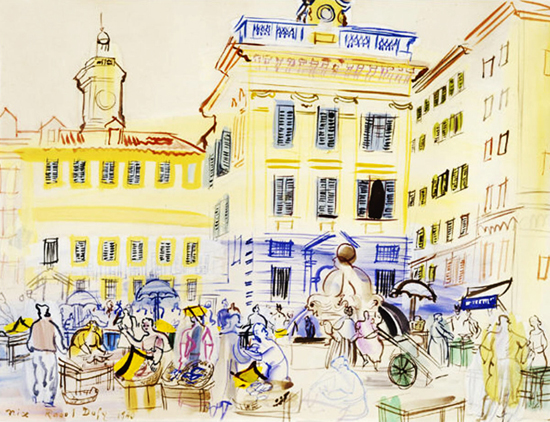

In [121]:
url = urllib.request.urlopen("http://brainartkid.com/files/attach/images/185/237/001/1883055a76aa0e580d55bf6e6748aa78.jpg")
img = Image.open(BytesIO(url.read()))
img = img.convert("RGB")

우리가 만든 함수에 이미지 주소를 넣으면, 이미지 크기를 모델에서 학습한 크기와 맞게 100x100으로 변환합니다.

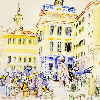

In [163]:
img = load_image("http://brainartkid.com/files/attach/images/185/237/001/1883055a76aa0e580d55bf6e6748aa78.jpg")
img

이 이미지를 numpy array로 변환하고 예측해 보겠습니다.

In [164]:
test_image = np.array(
    [tf.keras.preprocessing.image.img_to_array(img)]
)
print(model.predict(test_image))
np.argmax(model.predict(test_image)) + 1

[[0.02720881 0.182767   0.79002416]]


3

팝아트라고 나왔네요. 팝아트 같기도..? ^^;

### 테스트 2

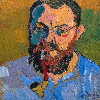

In [161]:
img = load_image("http://t1.daumcdn.net/brunch/service/user/4SZ/image/jHxqjd4uX8JezCI9l5LwM1nibDM.jpg")
img

In [162]:
test_image = np.array(
    [tf.keras.preprocessing.image.img_to_array(img)]
)
print(model.predict(test_image))
np.argmax(model.predict(test_image)) + 1

[[9.9980837e-01 9.2178270e-05 9.9501325e-05]]


1

### 테스트 3

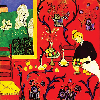

In [158]:
img = load_image("http://brainartkid.com/files/attach/images/185/237/001/ee8076137775c8ba2dcfa1bba2b01907.jpg")
img

In [159]:
test_image = np.array(
    [tf.keras.preprocessing.image.img_to_array(img)]
)
print(model.predict(test_image))
np.argmax(model.predict(test_image)) + 1

[[0.11632961 0.02198733 0.8616831 ]]


3

### 테스트 4

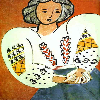

In [168]:
img = load_image("http://brainartkid.com/files/attach/images/185/237/001/53bf7fb38f5f52fbeb1fa4866aa6a9a0.jpg")
img

In [169]:
test_image = np.array(
    [tf.keras.preprocessing.image.img_to_array(img)]
)
print(model.predict(test_image))
np.argmax(model.predict(test_image)) + 1

[[0.41772342 0.16436256 0.417914  ]]


3

요건 인상파나 팝아트 확률이 비슷하게 나왔네요 ><

성능을 높이기 위해서는, 데이터의 양을 늘리기 위해서 Data Augmentation하거나, 이미지의 크기를 변경하는 등 여러 전처리 작업을 해 보는 것이 필요해 보입니다. :D